In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Aplicando Análise Fatorial por Componentes Principais em Conjunto com Clusters Hieráquicos

Exemplo da aula do MBA DSA USP/ESALQ com Prof. Wilson Tarantin Jr.

Prof. Wilson Tarantin Jr.

Fonte dos dados: https://www.kaggle.com/datasets/vipulgohel/clustering-pca-assignment?resource=download&select=Country-data.csv

- Referência PCA: https://www.datacamp.com/tutorial/introduction-factor-analysis
- Documentação PCA: https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html


- Referência CH: https://zephyrnet.com/pt/definitive-guide-to-hierarchical-clustering-with-python-and-scikit-learn/
- Documentação CH: https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html


### Aplicabilidade

Condensar as características quantitativas dos países em menos fatores e usálos para agrupá-los através da Clusterização Hierárquica.

### Objetivo da Análise

Criar um agrupamento dos países que apresentam características similares entre eles.



# Etapa 1

# Análise Fatorial

In [3]:
#Importando a base
paises = pd.read_csv(r'bases\Países PCA Cluster.csv', sep=',', decimal='.')

In [4]:
paises

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [5]:
paises.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


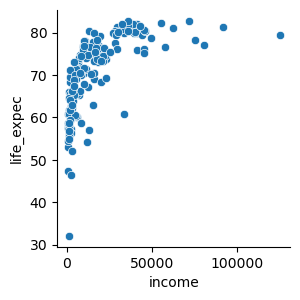

In [6]:
#Plotando gráfico 
#https://datavizpyr.com/how-to-make-scatter-plot-with-regression-line-using-seaborn-in-python/
#https://seaborn.pydata.org/generated/seaborn.regplot.html

g = sns.pairplot(data=paises, 
                 y_vars='life_expec', 
                 x_vars=['income'], 
                 height=3)
#g.map(sns.regplot, fit_reg=True, ci=None)
plt.show()

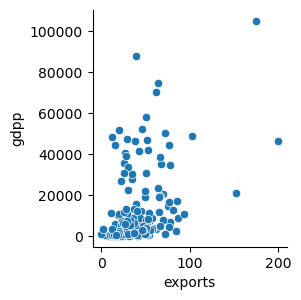

In [7]:
#Plotando gráfico 
#https://datavizpyr.com/how-to-make-scatter-plot-with-regression-line-using-seaborn-in-python/
#https://seaborn.pydata.org/generated/seaborn.regplot.html

g = sns.pairplot(data=paises, 
                 y_vars='gdpp', 
                 x_vars=['exports'], 
                 height=3)
#g.map(sns.regplot, fit_reg=True, ci=None)
plt.show()

### Matriz de Correlação

**A análise Fatorial baseia-se na matriz de correlação de Pearson.**

In [8]:
#Verifica correlação Ano 1
variaveis = paises.iloc[:,1:]

matriz_corr = variaveis.corr()
matriz_corr

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


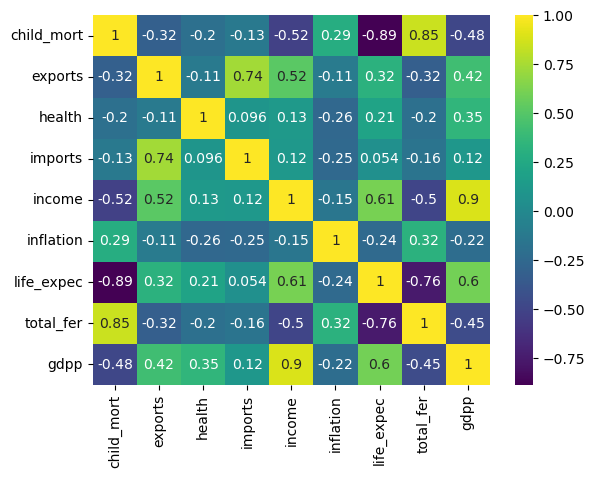

In [9]:
#Gráfico matriz correlação

sns.heatmap(matriz_corr, cmap='viridis', annot=True)
plt.show()

### Matriz de Significância

Matriz com p-valores do coeficiente de correlação. <br> 
Avaliar a significância individual de cada coeficiente de correlação dos pares de variáveis.

**p-valor < 0,05 indica que o coeficiente de correlação é estatisticamente relevante**

Todas as variáveis possuem coeficientes de correlação significantes.

In [10]:
from matrixSig import matrixSig

matrixsig = matrixSig(matriz_corr, variaveis)
matrixsig.round(2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,NA,0.00003,0.00941,0.10137,0.0,0.00016,0.0,0.0,0.0
exports,0.00003,NA,0.14096,0.0,0.0,0.16755,0.00003,0.00002,0.0
health,0.00941,0.14096,NA,0.21852,0.09512,0.00087,0.00628,0.01085,0.0
imports,0.10137,0.0,0.21852,NA,0.11505,0.00129,0.4851,0.04007,0.13719
income,0.0,0.0,0.09512,0.11505,NA,0.05671,0.0,0.0,0.0
inflation,0.00016,0.16755,0.00087,0.00129,0.05671,NA,0.00181,0.00003,0.004
life_expec,0.0,0.00003,0.00628,0.4851,0.0,0.00181,NA,0.0,0.0
total_fer,0.0,0.00002,0.01085,0.04007,0.0,0.00003,0.0,NA,0.0
gdpp,0.0,0.0,0.0,0.13719,0.0,0.004,0.0,0.0,NA


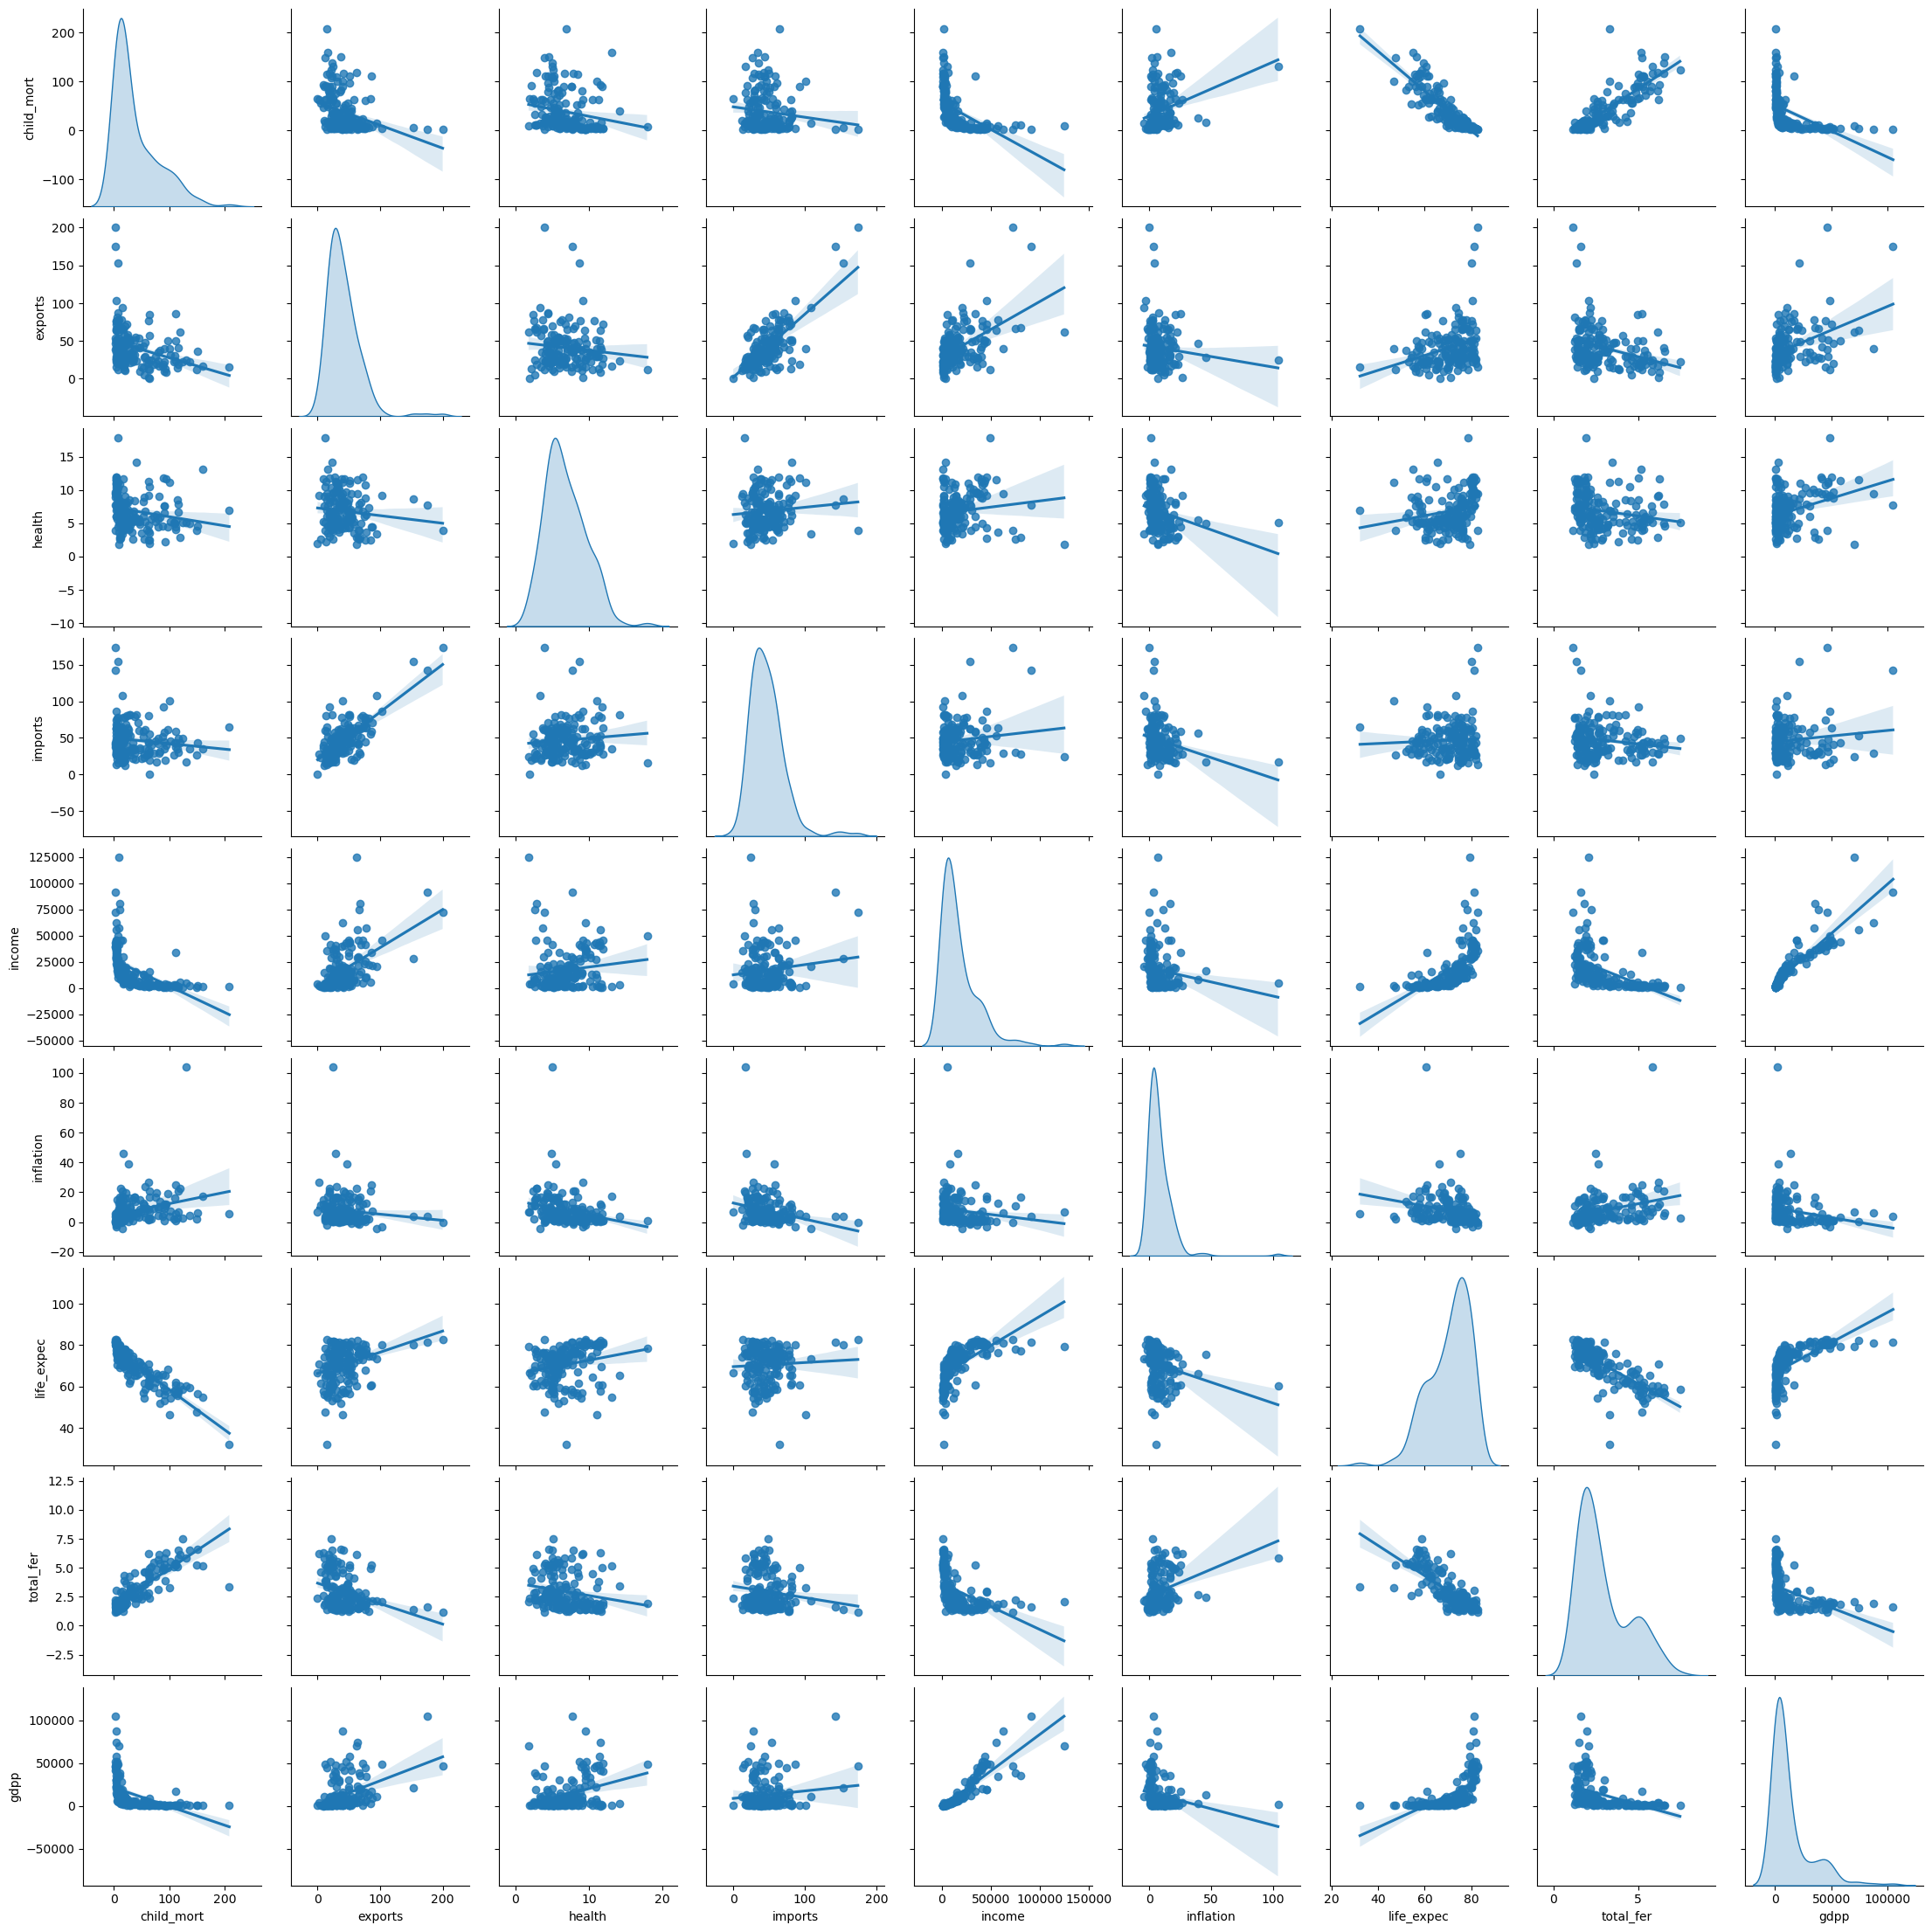

In [11]:
#Scatter Matrix
sns.pairplot(variaveis, diag_kind='kde', kind='reg')
plt.show()

# Aplicando Análise Fatorial PCA

### Teste de Esfericidade de Barlett

Avalia se a aplicação da análise fatorial é adequada ou não.<br>
O teste verifica se os coeficientes de correlação são estatisticamente diferentes de zero.

p-valor < 0,05: rejeita H0

>H0: A Matriz de Correlação é igual à Matriz Identidade.

>H1: A Matriz de Correlação não é igual à Matriz Identidade.


Não queremos que as correlações sejam iguais a zero, pois assim não existiria nenhuma correlação entre as variáveis e consequentemente não seria possível criar fatores.

In [12]:
#https://www.datacamp.com/tutorial/introduction-factor-analysis
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

# Calcula p-valor para avaliar se rejeita H0
chi_square_value, p_value=calculate_bartlett_sphericity(variaveis)
print()

print(f'ChiSq: {chi_square_value:.4f}, p-value: {p_value:.4f}')


ChiSq: 1169.7372, p-value: 0.0000


### Elaboração da Análise Fatorial por Componentes Principais

In [13]:
#https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html#module-factor_analyzer.factor_analyzer
from factor_analyzer import FactorAnalyzer

# Aplicando o metodo fatorial utilziando todas as variáveis da base
fa = FactorAnalyzer(rotation=None, n_factors=len(variaveis.columns), method='principal')
fa.fit(variaveis)

FactorAnalyzer(method='principal', n_factors=9, rotation=None,
               rotation_kwargs={})

### Fatores

Valor preditos das observações dentro dos fatores.

Esses fatores apresentam correlação zero entre eles. Não são correlacionados.

In [14]:
fatores_preditos = pd.DataFrame(fa.transform(variaveis))
fatores_preditos.columns = [f'Fator {1+i}' for i, v in enumerate(fatores_preditos.columns)]
fatores_preditos.head(100).round(3)

,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6,Fator 7,Fator 8,Fator 9
0,-1.432,0.077,-0.664,1.008,-0.195,0.538,1.137,-1.397,-0.055
1,0.211,-0.473,-0.308,-1.164,0.215,-0.179,0.739,0.744,0.670
2,-0.140,-0.366,1.129,-0.870,0.193,0.850,-0.259,0.620,0.325
3,-1.442,1.364,1.410,0.842,-0.336,1.159,-1.309,1.198,-0.353
4,0.508,0.110,-0.209,-0.849,-0.237,0.438,0.718,0.080,0.365
...,...,...,...,...,...,...,...,...,...
95,0.605,1.288,0.498,-1.089,0.114,0.279,-1.058,-0.490,-0.191
96,0.545,0.812,-0.250,-1.092,0.309,0.975,-1.646,0.748,-0.217
97,-1.678,0.452,-0.230,1.076,-1.596,1.396,-0.208,1.619,1.058
98,1.809,3.832,-0.944,-0.502,1.991,0.684,-0.768,1.242,0.744


In [15]:
fatores_preditos.corr().round(1)

,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6,Fator 7,Fator 8,Fator 9
Fator 1,1.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0
Fator 2,0.0,1.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0
Fator 3,-0.0,0.0,1.0,0.0,0.0,-0.0,-0.0,0.0,0.0
Fator 4,0.0,-0.0,0.0,1.0,0.0,-0.0,0.0,0.0,-0.0
Fator 5,-0.0,-0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Fator 6,-0.0,-0.0,-0.0,-0.0,0.0,1.0,-0.0,0.0,-0.0
Fator 7,-0.0,-0.0,-0.0,0.0,0.0,-0.0,1.0,-0.0,0.0
Fator 8,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,1.0,0.0
Fator 9,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,1.0


### Eigenvalues ( Autovalores)

O primeiro Autovalor é sempre o maior valor e que gera o fator principal.


Os Autovalores apresentam a proporção da variância que foi compartilhada pelas variáveis originais na formação daquele fator.

46% da variância das variáveis originais já estão representadas no primeiro fator. <br>
17,2% da variância das variáveis originais estão representadas no segundo fator. <br>
13,0% da variância das variáveis originais estão representadas no terceiro fator. <br>
As 3 representam 76,1% da variância das variáveis originais.

In [16]:
tabela_eigen = pd.DataFrame(fa.get_factor_variance())
tabela_eigen.columns = [f'Fator {1+i}' for i, v in enumerate(tabela_eigen.columns)]
tabela_eigen.index = ['Autovalor', 'Variância', 'Variância Acumulada']
tabela_eigen.round(3)

,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6,Fator 7,Fator 8,Fator 9
Autovalor,4.136,1.546,1.170,0.995,0.661,0.224,0.113,0.088,0.067
Variância,0.460,0.172,0.130,0.111,0.073,0.025,0.013,0.010,0.007
Variância Acumulada,0.460,0.631,0.761,0.872,0.945,0.970,0.983,0.993,1.000


### Scores/ Weights

- Fator 1 possui maior peso nas variáveis Child_mort, income, life_expec, total_fer e gdpp.
- Fator 2 possui maior peso nas variáveis exports, imports.
- Fator 3 possui maior peso em health e inflation.

In [17]:
tabela_scores = pd.DataFrame(fa.weights_)
tabela_scores.columns = [f'Fator {1+i}' for i, v in enumerate(tabela_scores.columns)]
tabela_scores.index = variaveis.columns
tabela_scores.round(3)

,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6,Fator 7,Fator 8,Fator 9
child_mort,-0.206,0.155,-0.027,0.372,-0.208,-0.424,-0.236,2.297,1.267
exports,0.140,0.493,0.134,0.003,0.071,0.125,-2.100,0.048,-0.476
health,0.074,-0.195,-0.551,0.463,0.637,-0.015,-0.742,-0.244,0.437
imports,0.079,0.540,-0.277,-0.072,0.314,0.064,1.758,0.097,0.383
income,0.196,0.018,0.279,0.393,-0.304,-0.339,0.284,-1.187,2.370
inflation,-0.095,-0.007,0.594,0.151,0.880,-0.140,0.311,0.039,-0.098
life_expec,0.209,-0.179,0.105,-0.204,0.133,1.271,0.055,1.698,1.137
total_fer,-0.199,0.125,0.018,0.379,-0.166,1.588,0.086,-0.987,-0.102
gdpp,0.193,-0.037,0.114,0.533,-0.222,-0.035,0.721,0.840,-2.419


### Cargas Fatoriais

Representam a correlação de pearson entre o fator e a variável original.<br>
Conseguimos identificar quais os componentes relevantes dentro de cada fator.

Mesma análise do Scores/Weights

In [18]:
tabela_cargas = pd.DataFrame(fa.loadings_)
tabela_cargas.columns = [f'Fator {1+i}' for i, v in enumerate(tabela_cargas.columns)]
tabela_cargas.index = variaveis.columns
tabela_cargas.round(3)

,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6,Fator 7,Fator 8,Fator 9
child_mort,-0.853,0.240,-0.032,0.370,-0.137,-0.095,-0.027,0.203,0.085
exports,0.577,0.762,0.157,0.003,0.047,0.028,-0.238,0.004,-0.032
health,0.307,-0.302,-0.645,0.461,0.421,-0.003,-0.084,-0.022,0.029
imports,0.328,0.835,-0.324,-0.072,0.208,0.014,0.199,0.009,0.026
income,0.810,0.028,0.326,0.391,-0.201,-0.076,0.032,-0.105,0.159
inflation,-0.393,-0.010,0.695,0.150,0.581,-0.031,0.035,0.003,-0.007
life_expec,0.866,-0.277,0.123,-0.203,0.088,0.284,0.006,0.150,0.076
total_fer,-0.821,0.193,0.021,0.377,-0.110,0.355,0.010,-0.087,-0.007
gdpp,0.798,-0.057,0.133,0.531,-0.146,-0.008,0.082,0.074,-0.162


# Critério de Kaiser

Selecionam-se os autovalores maiores do que 1

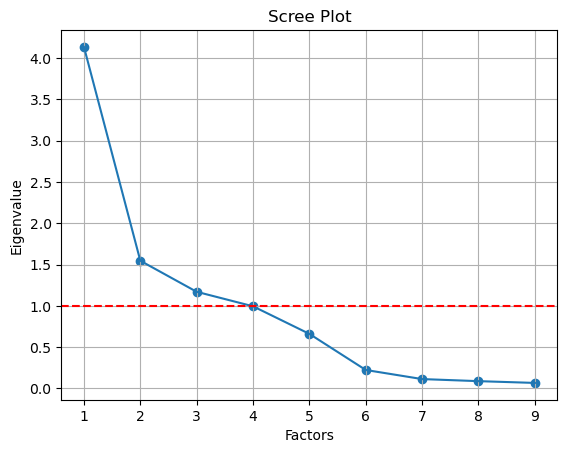

In [19]:
#eigen values

ev, v = fa.get_eigenvalues()

#https://www.kaggle.com/code/caesarlupum/factor-analysis-segmentation-analysis/notebook
plt.scatter(range(1,variaveis.shape[1]+1),ev)
plt.plot(range(1,variaveis.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.grid()
plt.show()

In [20]:
#Contando fatores que possuem eigenvalues > 1
k = len(list(filter(lambda x: x>1, ev )))

#Aplica Factor Analysis usando critério de Kaiser

fa2 = FactorAnalyzer(n_factors=k, method='principal', rotation=None)
fa2.fit(variaveis)

FactorAnalyzer(method='principal', rotation=None, rotation_kwargs={})

### Comunalidades

Verificar se houve muita perda de variância utilizando apenas 3 fatores <br>

- Poucas perdas da variância nas variáveis de forma geral.

In [21]:
comunalidade = pd.DataFrame(fa2.get_communalities())
comunalidade.columns = ['Comunalidade']
comunalidade.index = variaveis.columns
comunalidade.round(3)

,Comunalidade
child_mort,0.786
exports,0.939
health,0.602
imports,0.911
income,0.764
inflation,0.638
life_expec,0.842
total_fer,0.712
gdpp,0.659


# Loading Plot

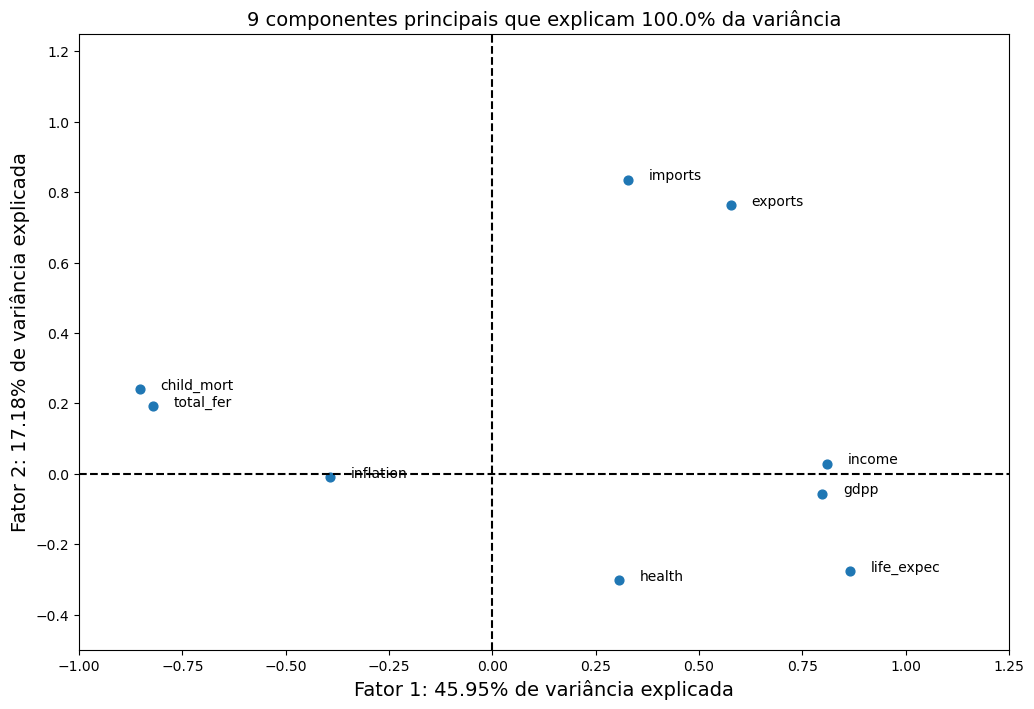

In [22]:
# Gráfico das cargas fatoriais e suas variâncias nos componentes principais
plt.figure(figsize=(12,8))

tabela_cargas_chart = tabela_cargas.reset_index()

plt.scatter(tabela_cargas_chart['Fator 1'], tabela_cargas_chart['Fator 2'], s=40)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.05, point['y'], point['val'])

label_point(x = tabela_cargas_chart['Fator 1'],
            y = tabela_cargas_chart['Fator 2'],
            val = tabela_cargas_chart['index'],
            ax = plt.gca()) 

plt.axhline(y=0, color='black', ls='--')
plt.axvline(x=0, color='black', ls='--')
plt.ylim([-0.5,1.25])
plt.xlim([-1.0,1.25])
plt.title(f"{len(tabela_cargas.columns)} componentes principais que explicam {round(tabela_eigen.T['Variância'].sum()*100,2)}% da variância", fontsize=14)
plt.xlabel(f"Fator 1: {round(tabela_eigen.T.iloc[0]['Variância']*100,2)}% de variância explicada", fontsize=14)
plt.ylabel(f"Fator 2: {round(tabela_eigen.T.iloc[1]['Variância']*100,2)}% de variância explicada", fontsize=14)
plt.show()

# Etapa 2

# Clusterização Hierárquica

A partir dos fatores, agrupar as observações em um número menor de clusters.

**Sempre verificar se as variáveis estão na mesma unidade de medida. <br>
Caso não estejam, é necessário realizar a padronização pelo Z-Score**

Nesse caso vamos trabalhar com os fatores gerados.

In [23]:
# Inserindo os Fatores no banco de Dados

paises['Fator_1'] = fatores_preditos['Fator 1']
paises['Fator_2'] = fatores_preditos['Fator 2']
paises['Fator_3'] = fatores_preditos['Fator 3']

paises

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Fator_1,Fator_2,Fator_3
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-1.432425,0.076895,-0.663792
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.211401,-0.472976,-0.308257
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.140254,-0.366037,1.129097
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-1.441964,1.363511,1.409673
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0.508242,0.109897,-0.208645
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,-0.403530,0.514322,-0.360425
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,-0.270961,-0.992251,2.866730
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0.245140,1.118392,-0.220481
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,-0.928119,-0.088019,1.025798


In [24]:
variaveisCluster = paises.iloc[:,10:]
variaveisCluster.describe().round(3)

,Fator_1,Fator_2,Fator_3
count,167.000,167.000,167.000
mean,0.000,0.000,-0.000
std,1.003,1.003,1.003
min,-2.415,-2.410,-2.509
25%,-0.680,-0.605,-0.482
50%,0.011,-0.076,-0.227
75%,0.602,0.445,0.372
max,3.402,5.374,5.648


### Analisando a quantidade de clusters ótimos pelo Método Hierárquico Aglomerativo

Métodos do Cálculo das Distâncias:
- **complete**: encadeamento completo (furthest neighbor ou complete linkage)
- **single**: encadeamento único (nearest neighbor ou single linkage)
- **average**: encadeamento médio (between groups ou average linkage)

Usaremos Complete porque as observações estão bem próximas.

In [25]:
#https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html
import scipy.cluster.hierarchy as shc

#Medida de Distância sokalmichener
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist

clusters = shc.linkage(variaveisCluster,
                      method='complete',
                      metric='euclidean')

#### Quanto maior o salto de distância, mais distintas são as observações no Dendrograma.

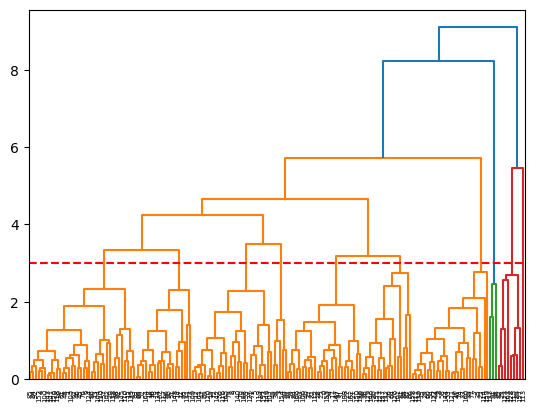

In [26]:
#Plota Dendrograma
plt.figure()
shc.dendrogram(Z=clusters, 
               orientation='top', 
               distance_sort='descending', 
               count_sort='descending',
              )
plt.axhline(y=3, c='r',ls='--')
plt.show()

# Corte na altura 3 formando 10 clusters.

### Aplicando Cluster Hierárquico

In [27]:
#Aplicando Clusters Método Aglomeração Hierárquica criando 10 grupos
cluster_H = shc.cut_tree(clusters, n_clusters=10)

paises['cluster_H'] = cluster_H

In [28]:
paises['cluster_H'].value_counts()

1    36
2    27
4    26
0    25
5    19
7    17
6     8
3     5
8     3
9     1
Name: cluster_H, dtype: int64

In [29]:
paises

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Fator_1,Fator_2,Fator_3,cluster_H
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-1.432425,0.076895,-0.663792,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.211401,-0.472976,-0.308257,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.140254,-0.366037,1.129097,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-1.441964,1.363511,1.409673,3
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0.508242,0.109897,-0.208645,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,-0.403530,0.514322,-0.360425,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,-0.270961,-0.992251,2.866730,6
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0.245140,1.118392,-0.220481,5
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,-0.928119,-0.088019,1.025798,2


## Análise de Variância de um Fator (ANOVA)

**Identidicar as Variáveis que mais ajudaram na formação dos clusters.**

- Mean Sq do Cluster_H: indica a variabilidade entre grupos
- Mean Sq dos Residuals: indica a variabilidade dentro dos grupos
- F Value: estatística de teste (Sum sq do Cluster_H / Sum Sq dos Resíduals)
- Pr(>F): p-valor da estatística
- p-valor < 0.05: rejeita-se H0 

>**H0:** A variável não é relevante para a separação dos clusters

>**H1:** A variável é relevante para a separação do Cluster

**Objetivo é comparar variabilidade entre os grupos e variabilidade dentro dos grupos** 

Variabilidade entre grupos tem que ser maior do que variabilidade dentro dos grupos, ou seja, os grupos devem ser diferentes entre si para formar clusters bem distintos.

**Estatística F:**
> Variabilidade entre grupos / variabilidade dentro do grupo

ou

> mean_sq (Cluster_H) / mean_sq (Residual)

**A variável mais discriminante dos grupos contém maior estatística F (e significativa: p-valor < 0.05)**

### ANOVA CLUSTER HIERÁRQUICO

In [30]:
# Referência: https://www.reneshbedre.com/blog/anova.html
from bioinfokit.analys import stat

columns = ['Fator_1', 'Fator_2', 'Fator_3']

for column in paises[columns]:
    res = stat()
    res.anova_stat(df=paises, res_var=column, anova_model=f'{column} ~ C(cluster_H)')
    print(column)
    print(res.anova_summary)
    print()

Fator_1
                 df      sum_sq    mean_sq          F        PR(>F)
C(cluster_H)    9.0  127.263319  14.140369  55.868731  1.800870e-44
Residual      157.0   39.736681   0.253100        NaN           NaN

Fator_2
                 df      sum_sq    mean_sq          F        PR(>F)
C(cluster_H)    9.0  135.046181  15.005131  73.725323  8.180003e-52
Residual      157.0   31.953819   0.203528        NaN           NaN

Fator_3
                 df      sum_sq    mean_sq          F        PR(>F)
C(cluster_H)    9.0  127.425292  14.158366  56.168788  1.312609e-44
Residual      157.0   39.574708   0.252068        NaN           NaN



### Estatísticas Descritivas dos Grupos

In [31]:
#GDP
paises.groupby('cluster_H')['gdpp'].describe().round(0)

,count,mean,std,min,25%,50%,75%,max
cluster_H,,,,,,,,
0,25.0,1255.0,1477.0,334.0,488.0,708.0,1290.0,6350.0
1,36.0,13079.0,16294.0,1630.0,3895.0,6455.0,13150.0,74600.0
2,27.0,4026.0,3298.0,482.0,1365.0,2810.0,5430.0,10700.0
3,5.0,5802.0,6427.0,1200.0,2740.0,3530.0,4440.0,17100.0
4,26.0,34202.0,19047.0,6250.0,15750.0,34750.0,46725.0,87800.0
5,19.0,10049.0,10864.0,880.0,3665.0,7100.0,12550.0,48700.0
6,8.0,30412.0,19160.0,12100.0,17850.0,27150.0,36100.0,70300.0
7,17.0,1563.0,1812.0,231.0,562.0,769.0,1490.0,7280.0
8,3.0,57567.0,43012.0,21100.0,33850.0,46600.0,75800.0,105000.0


In [32]:
#health
paises.groupby('cluster_H')['health'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
cluster_H,,,,,,,,
0,25.0,5.95,1.51,3.77,4.98,5.30,6.78,9.01
1,36.0,7.49,2.19,4.09,5.99,6.92,9.18,11.90
2,27.0,4.89,1.82,1.97,3.56,5.07,5.70,9.12
3,5.0,3.34,1.02,2.46,2.50,2.85,4.41,4.48
4,26.0,9.85,2.13,7.46,8.44,9.54,10.98,17.90
5,19.0,6.15,1.63,3.40,5.08,6.03,7.18,9.19
6,8.0,3.35,1.01,1.81,2.74,3.25,3.98,4.91
7,17.0,8.59,3.20,4.51,5.69,8.50,11.30,14.20
8,3.0,6.79,2.49,3.96,5.86,7.77,8.21,8.65


In [33]:
#life_expec
paises.groupby('cluster_H')['life_expec'].describe().round(1)

,count,mean,std,min,25%,50%,75%,max
cluster_H,,,,,,,,
0,25.0,58.2,4.0,47.5,56.5,58.0,60.8,66.1
1,36.0,75.4,3.4,69.7,73.2,74.6,77.1,82.2
2,27.0,69.9,4.3,61.7,67.0,69.1,73.0,78.2
3,5.0,63.5,4.2,60.1,60.4,60.9,67.9,68.2
4,26.0,79.5,2.5,73.8,78.8,80.4,81.4,82.8
5,19.0,73.6,4.0,65.3,71.8,74.5,76.0,80.4
6,8.0,76.8,1.5,75.1,75.9,76.3,77.4,79.5
7,17.0,60.1,9.7,32.1,55.6,62.8,65.5,71.5
8,3.0,81.4,1.2,80.3,80.8,81.3,82.0,82.7
